author: Flavio Lichtenstein  
data update:  2019/02/07  
data created: 2016/07/20  
local: Molecular Biology/Inovation & CENTD - Butantan Institute  

### Lecture 09 - graph theory - hands on

### There are many packages to work with graphs: igraph


[igraph](https://igraph.org/python/doc/tutorial/tutorial.html)  
[igraph - amazon](https://rstudio-pubs-static.s3.amazonaws.com/74248_3bd99f966ed94a91b36d39d8f21e3dc3.html)  


In [2]:
suppressWarnings(library(igraph))

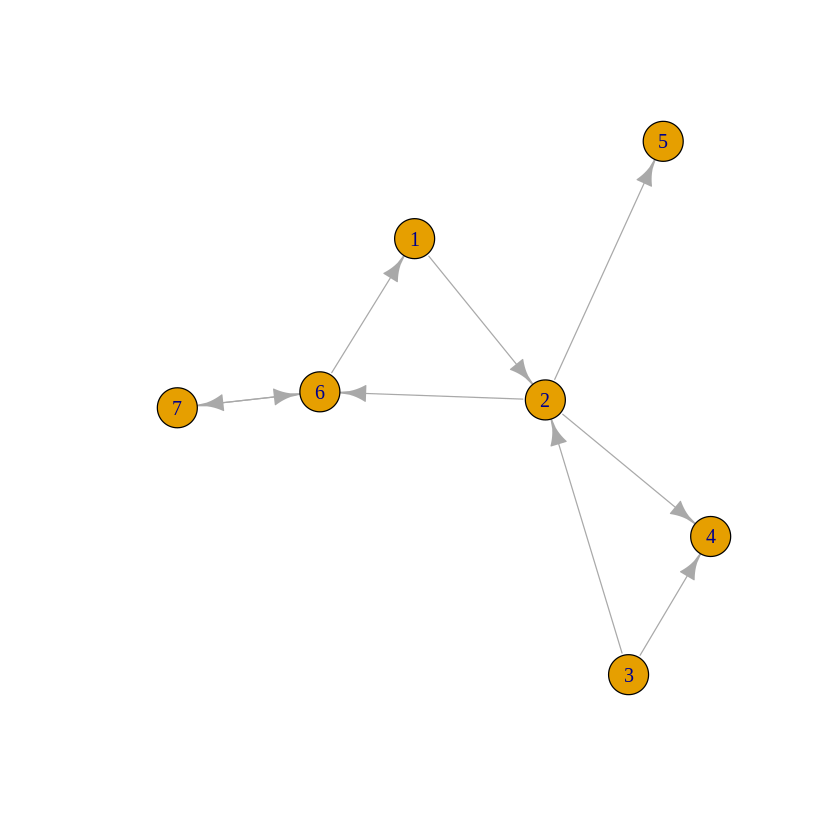

In [3]:
#-- build a graph manually

edges <- c(1,2, 3,2, 2,4, 2,5, 2,6, 6,1, 3,4, 7,6, 6,7)
g<-graph(edges, n=max(edges), directed=TRUE)
plot(g)

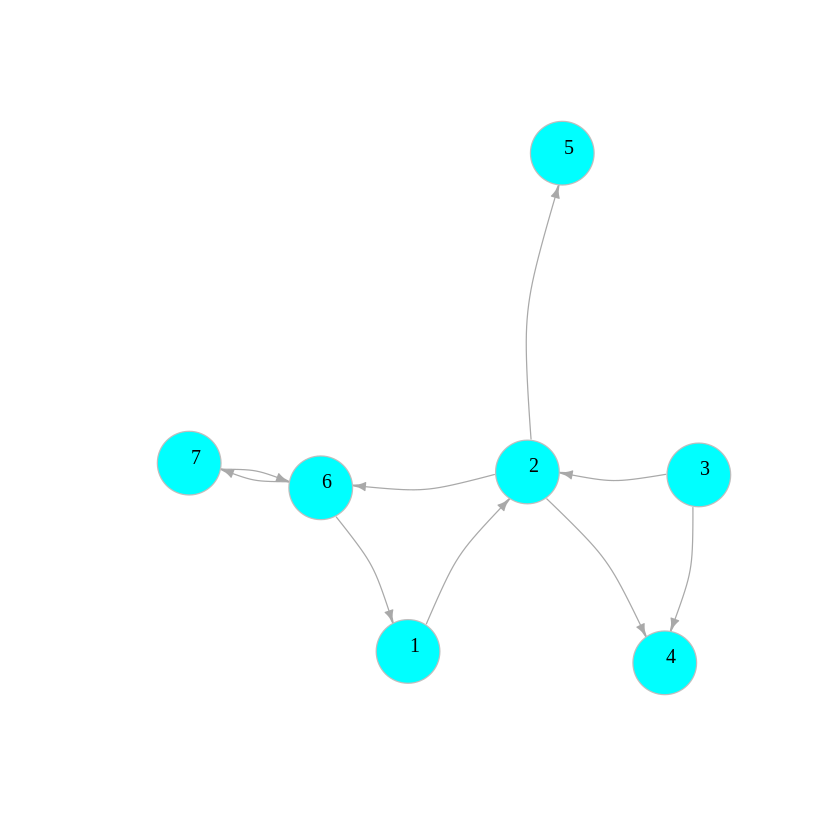

In [5]:
plot(g, edge.arrow.size=.5, vertex.color="cyan", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=1, vertex.label.dist=.5, edge.curved=0.2) 

In [6]:
id = tkplot(g, edge.arrow.size=.5, vertex.color="cyan", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=2, edge.curved=0.2)

In [7]:
tk_close(id)

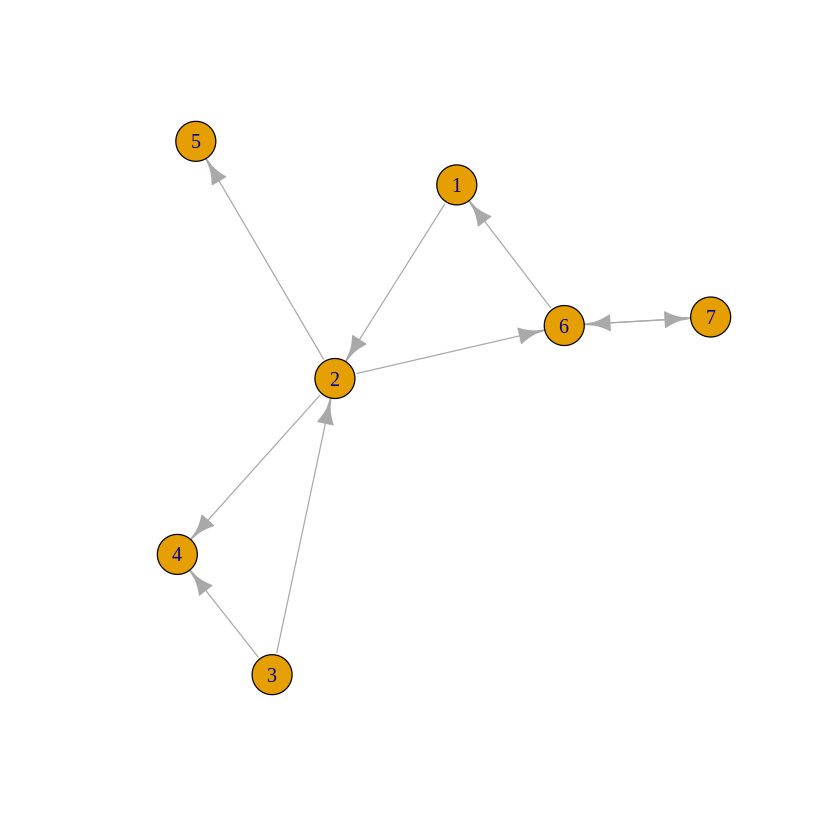

In [8]:
tkid <- tkplot(g) #tkid is the id of the tkplot that will open

l <- tkplot.getcoords(tkid) # grab the coordinates from tkplot
tk_close(tkid, window.close = T)

plot(g, layout=l)

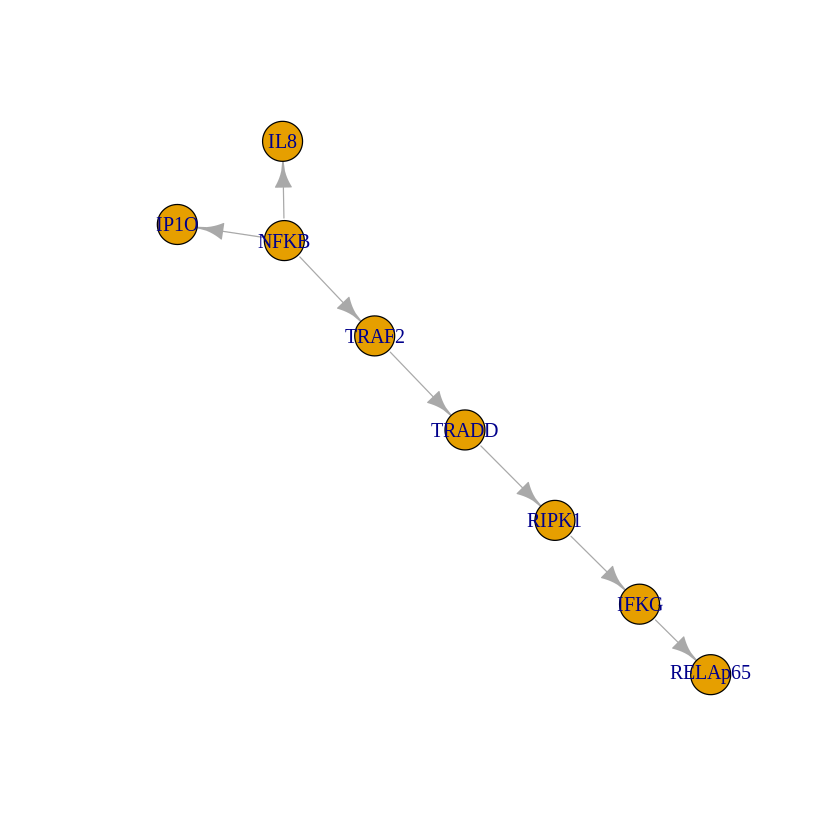

In [10]:
#--- linking genes/proteins - hypothesis

edges <- c("NFKB", "IP1O", "NFKB", "IL8", "NFKB", "TRAF2", "TRAF2", "TRADD", "TRADD", "RIPK1", 
               "RIPK1", "IFKG", "IFKG", "RELAp65")
g<-graph(edges, directed=TRUE)
plot(g)

In [11]:
g <- make_star(12, center=12) %u% make_ring(9, directed=TRUE)
E(g)$width <- sample(1:12, ecount(g), replace=TRUE)
lay <- layout_nicely(g)

id <- tkplot(g, layout=lay)

want.save = F

if (want.save) {
    canvas <- tk_canvas(id)
    tkpostscript(canvas, file="/tmp/output.eps")
}


In [12]:
tk_close(id)

ERROR: Error in eval(parse(text = cmd), .tkplot.env): object 'tkp.3' not found


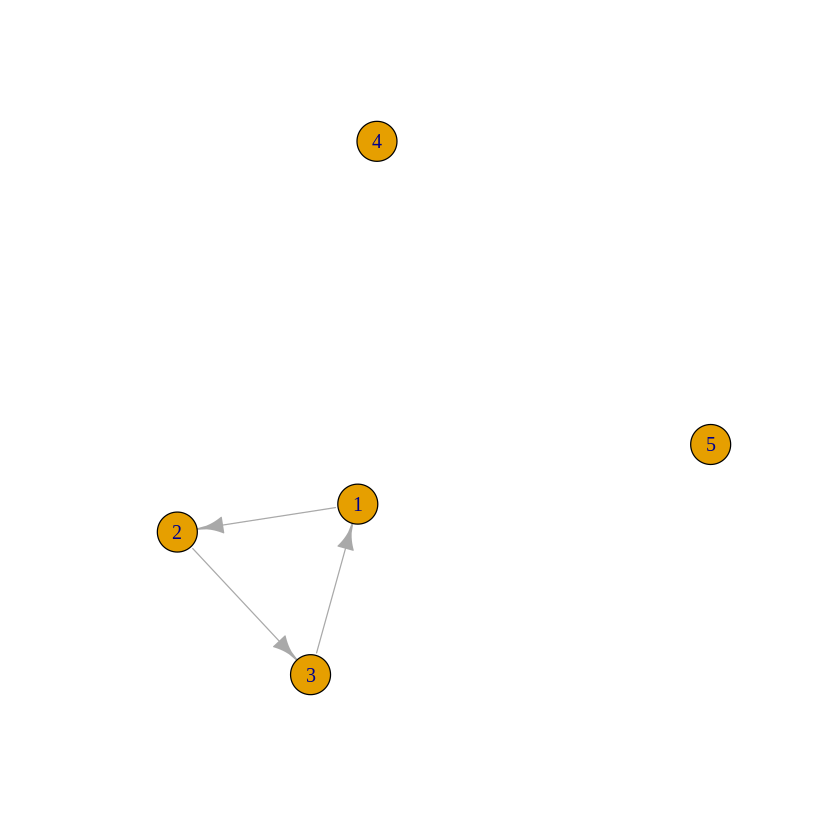

In [13]:
#-- from http://kateto.net/netscix2016
g2 <- graph( edges=c(1,2, 2,3, 3, 1), n=5 )
plot(g2) 

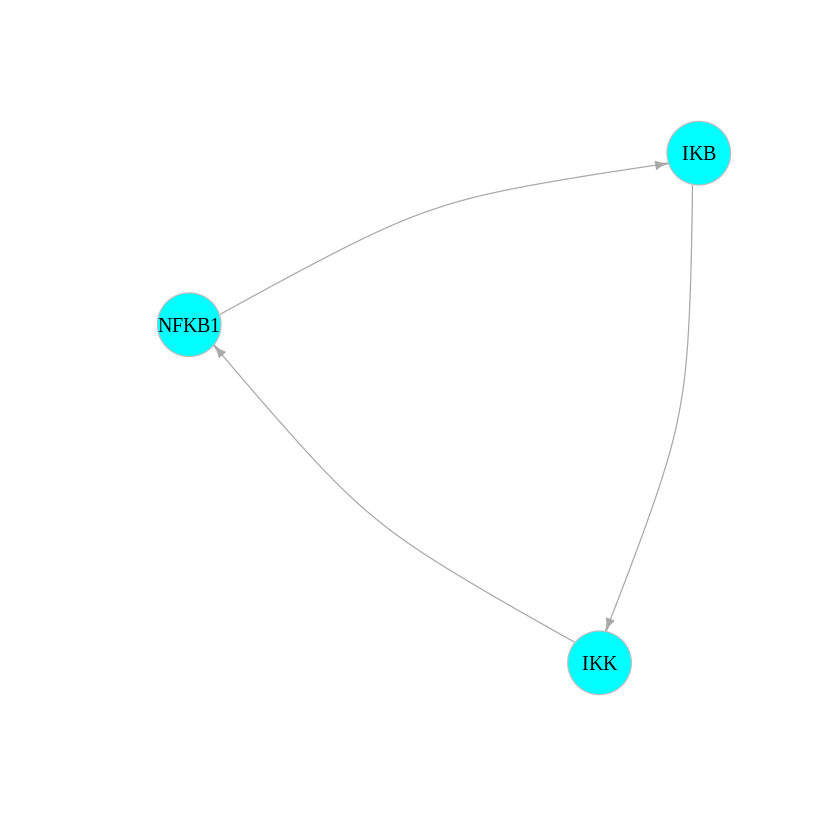

In [14]:
# When the edge list has vertex names, the number of nodes is not needed
g3 <- graph( c("NFKB1", "IKB", "IKB", "IKK", "IKK", "NFKB1")) # named vertices

plot(g3, edge.arrow.size=.5, vertex.color="cyan", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=1, vertex.label.dist=0, edge.curved=0.2) 

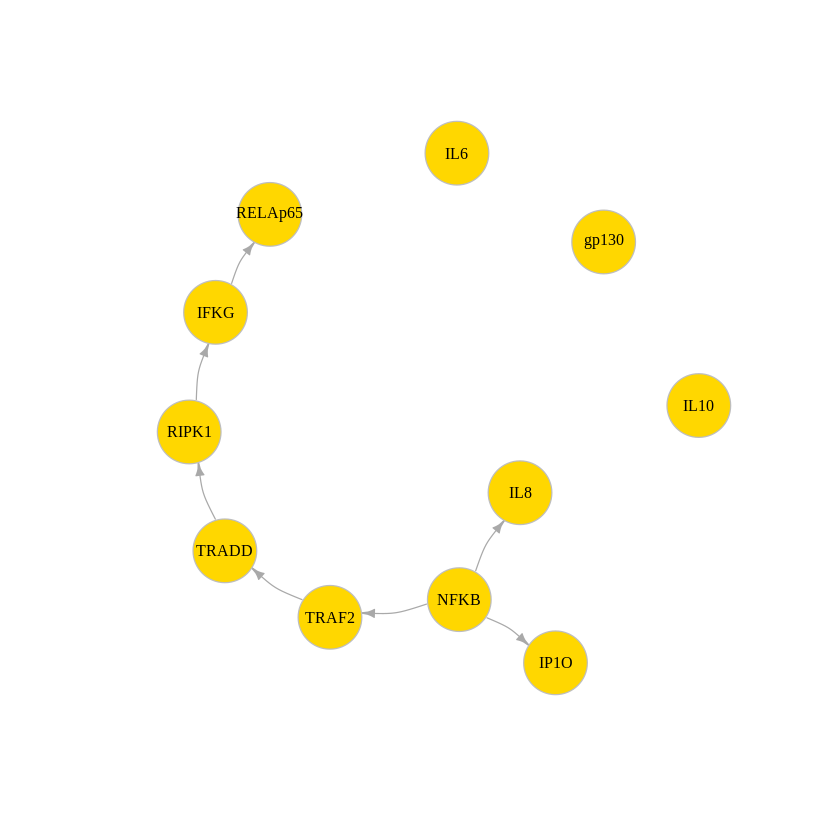

In [62]:
g4 <- graph( c("NFKB", "IP1O", "NFKB", "IL8", "NFKB", "TRAF2", "TRAF2", "TRADD", "TRADD", "RIPK1", 
               "RIPK1", "IFKG", "IFKG", "RELAp65"), 

             isolates=c("IL6", "IL10", "gp130") )  

# In named graphs we can specify isolates by providing a list of their names.

plot(g4, edge.arrow.size=.5, vertex.color="gold", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=0, edge.curved=0.2) 

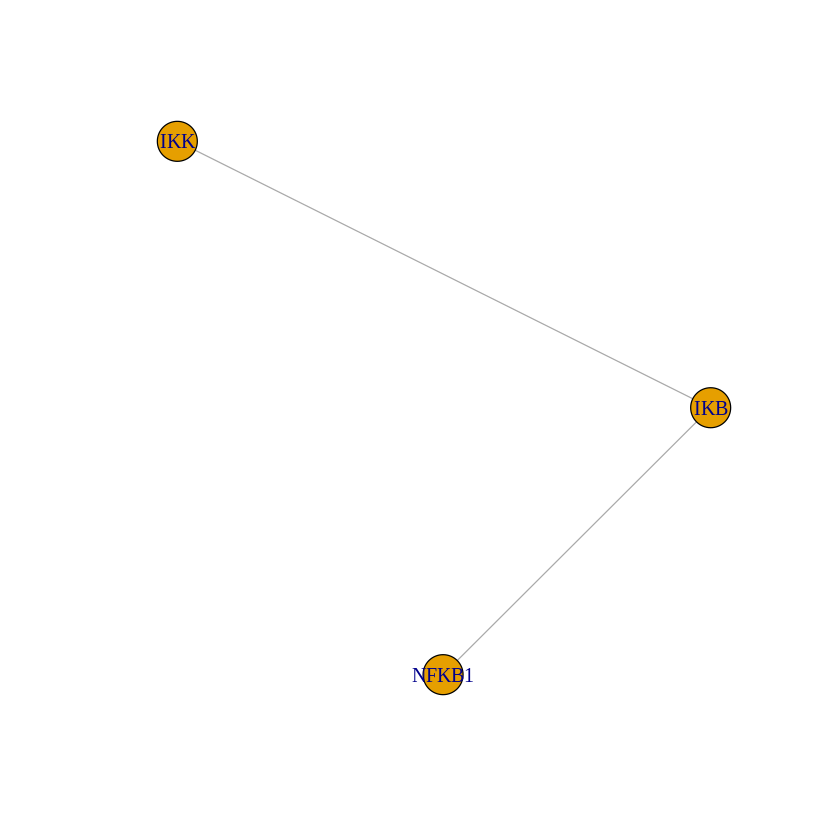

In [15]:
#-- Small graphs can also be generated with a description of this kind: 
#     - for undirected tie, +- or -+ 
#     - for directed ties pointing left & right, ++ for a symmetric tie, and “:” for sets of vertices.

plot(graph_from_literal(NFKB1-IKB, IKB-IKK)) # the number of dashes doesn't matter

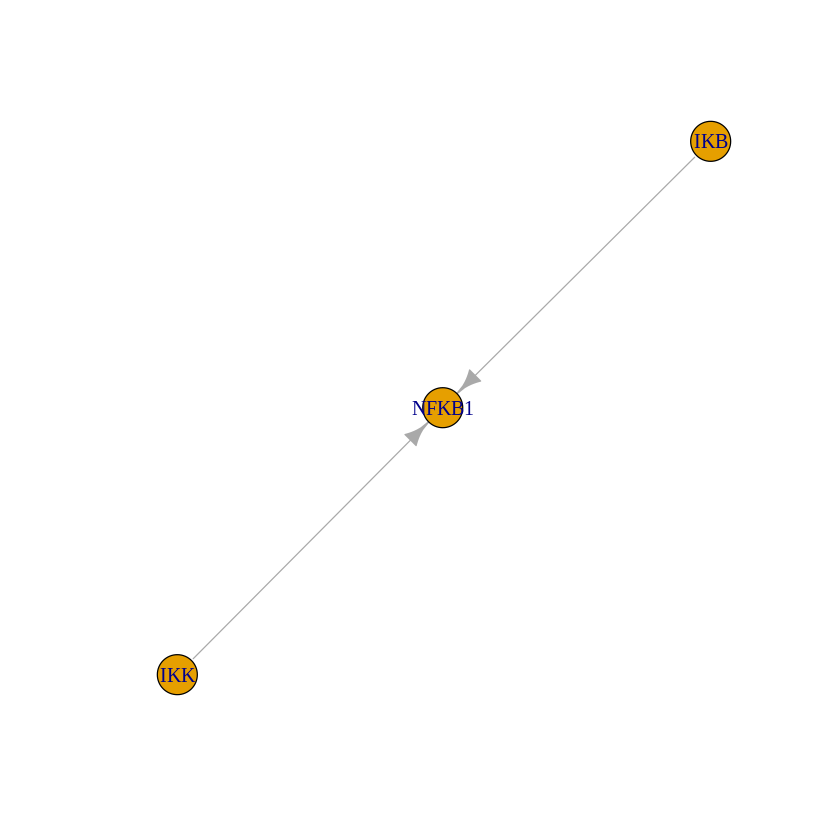

In [64]:
plot(graph_from_literal(IKB--+NFKB1, NFKB1+--IKK))

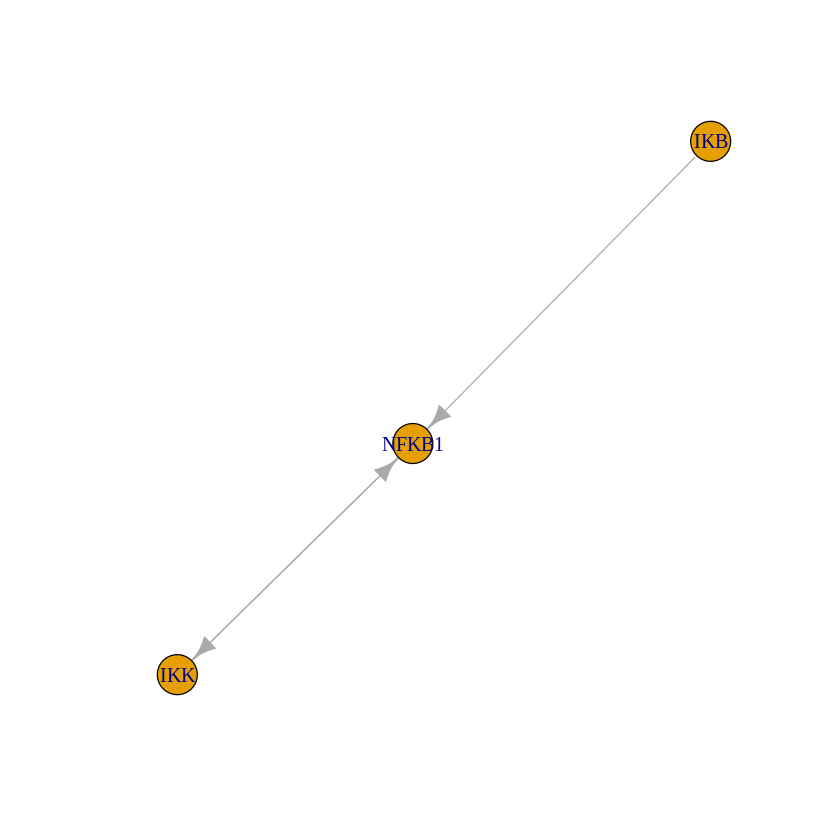

In [16]:
plot(graph_from_literal(IKB--+NFKB1, NFKB1+--+IKK)) 

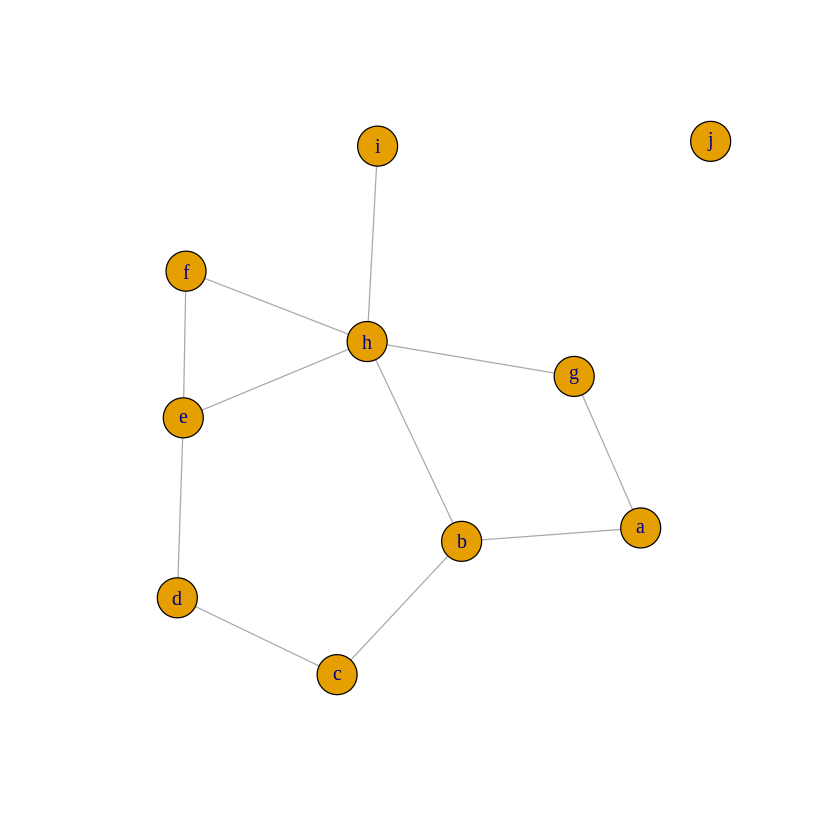

In [17]:
gl <- graph_from_literal(a-b-c-d-e-f, a-g-h-b, h-e:f:i, j)

plot(gl)

### Reading from a PPI table

PPI = protein protein interaction table

[david](https://david.ncifcrf.gov/)  
[kegg](https://www.genome.jp/kegg/pathway.html)  
[metacore](https://clarivate.com/products/metacore/)  
[reactome](https://reactome.org/)  
[string-db](https://string-db.org/cgi/input.pl)  


Suppose you have a table obtained from an experiment  
  
Columns:  
  * num - numeration  
  * netobj_from = network object from  
  * objtype_from = object type from (what kind of molecule)  
  * netobj_to = network object to  
  * objtype_to = object type to (what kind of molecule)  
  * effect = activation or ihhibition
  * mechanims = way of interaction  
  
  
in this first moment we are interested in netobj_from and netobj_to  
and we must transform these columns in a sequencial data array  

lets open the file that is in the "data" directory  

In [18]:
filename = "data/Activation of TNF-alpha-dependent pro-tumoral effect in colorectal cancer g1 h6 h12 interactions.csv"
file.exists(filename)

df = read.table(filename, sep="\t", header = T)


[1] TRUE

In [19]:
head(df, 15)

num,netobj_from,objtype_from,netobj_to,objtype_to,effect,mechanism
1,NIK(MAP3K14),Protein kinase,IKK-beta,Protein kinase,Activation,Phosphorylation
2,IKK-alpha,Protein kinase,I-kB,Generic binding protein,Inhibition,Phosphorylation
3,TNF-R1,Generic receptor,p38 MAPK,Protein kinase,Activation,Unspecified
4,TNF-R1,Generic receptor,VCAM1,Generic receptor,Activation,Influence on expression
5,IKK-gamma,Generic binding protein,IKK-alpha,Protein kinase,Activation,Binding
6,I-kB,Generic binding protein,RelA (p65 NF-kB subunit),Transcription factor,Inhibition,Binding
7,TAK1(MAP3K7),Protein kinase,IKK-alpha,Protein kinase,Activation,Binding
8,MEK1/2,Protein kinase,ERK1/2,Protein kinase,Activation,Phosphorylation
9,IKK-gamma,Generic binding protein,IKK-beta,Protein kinase,Activation,Binding
10,I-kB,Generic binding protein,NF-kB1 (p50),Transcription factor,Inhibition,Binding


In [20]:
df[1,]

num,netobj_from,objtype_from,netobj_to,objtype_to,effect,mechanism
1,NIK(MAP3K14),Protein kinase,IKK-beta,Protein kinase,Activation,Phosphorylation


***be careful when a column is a factor***  

use "paste" to transform in a character vector.

In [21]:
df[1,2]

[1] NIK(MAP3K14)
26 Levels: ABCC4 ALDR Axin c-Raf-1 G-protein alpha-s GRB2 H-Ras ... VCAM1

In [22]:
df[,2] = paste(df[,2])
df[,4] = paste(df[,4])

#-- now it is a character vector
df[1,2]

[1] "NIK(MAP3K14)"

### Creating an array to easily build a graph

In [23]:
arr = c()
for (i in 1:nrow(df)) {
    # arr = c(arr, c(df[i, "netobj_from"], df[i, "netobj_to"]) )
    arr = c(arr, c(df[i, 2], df[i, 4]) )
}

cat(arr)
cat("\n\n")
cat(nrow(df))
cat("\n")
cat(length(arr))

NIK(MAP3K14) IKK-beta IKK-alpha I-kB TNF-R1 p38 MAPK TNF-R1 VCAM1 IKK-gamma IKK-alpha I-kB RelA (p65 NF-kB subunit) TAK1(MAP3K7) IKK-alpha MEK1/2 ERK1/2 IKK-gamma IKK-beta I-kB NF-kB1 (p50) c-Raf-1 MEK1/2 ALDR Glutathione-HNE + NAD(P)H = NADP(+) + 1,4-Dihydroxy-3-(GSH)-nonane PGE2R2 G-protein alpha-s MADD GRB2 TRAF2 TAK1(MAP3K7) G-protein alpha-s Axin VCAM1 alpha-4/beta-1 integrin H-Ras c-Raf-1 TRAF2 NIK(MAP3K14) GRB2 SOS SOS H-Ras TRADD TRAF2 TRADD RIPK1 TNF-R1 TRADD TAK1(MAP3K7) IKK-beta Axin Beta-catenin TNF-alpha TNF-R1 TNF-R1 MADD TNF-R1 GRB2 TRAF2 RIPK1 NIK(MAP3K14) IKK-alpha NF-kB c-IAP2 RIPK1 IKK-gamma NF-kB TRAF1 NF-kB TRAF2 NF-kB ICAM1 NF-kB COX-2 (PTGS2) SOS K-RAS K-RAS c-Raf-1 NF-kB IP10 NF-kB IL-6 NF-kB GRO-1 NF-kB IL-8 NF-kB CCL2 ABCC4 <intracellular> Prostaglandin E2 = <extracellular region> Prostaglandin E2 IKK-beta I-kB Prostaglandin E2 extracellular region PGE2R2

47
94

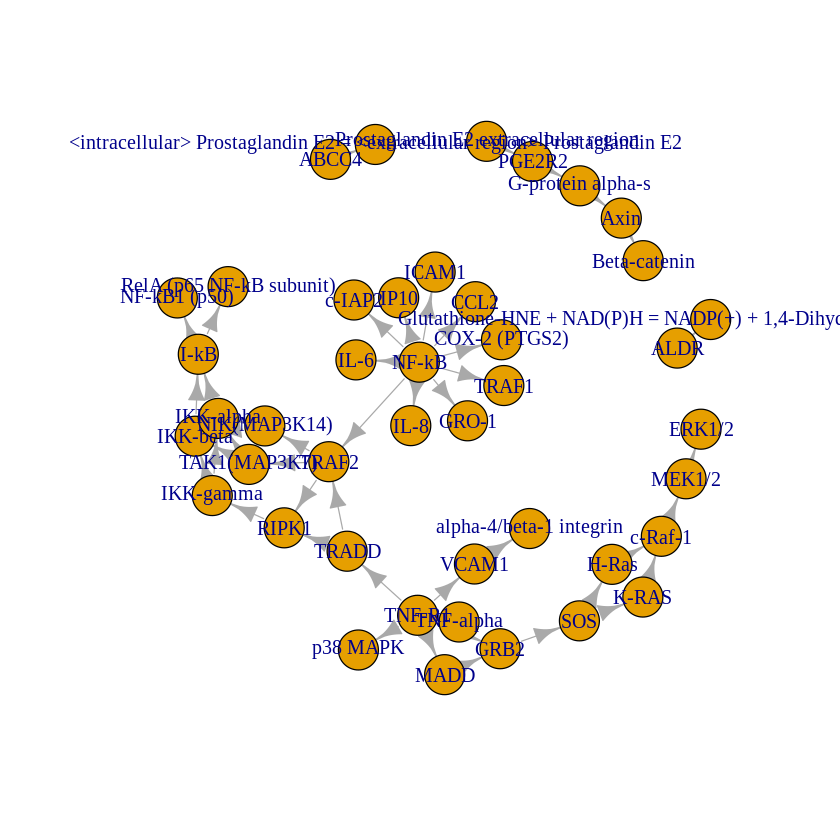

In [24]:
g <- graph(arr)
plot(g)

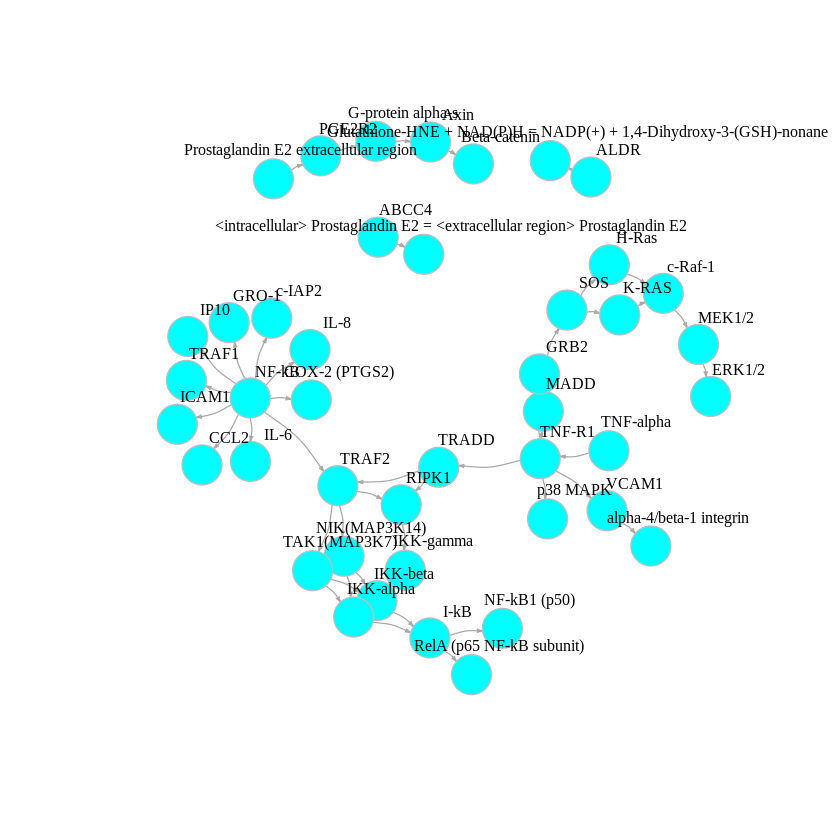

In [25]:
plot(g, edge.arrow.size=.2, vertex.color="cyan", vertex.size=15, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=2, edge.curved=0.2) 

### Edges == E()

In [26]:
E(g)

+ 47/47 edges from 197fe14 (vertex names):
 [1] NIK(MAP3K14)->IKK-beta                
 [2] IKK-alpha   ->I-kB                    
 [3] TNF-R1      ->p38 MAPK                
 [4] TNF-R1      ->VCAM1                   
 [5] IKK-gamma   ->IKK-alpha               
 [6] I-kB        ->RelA (p65 NF-kB subunit)
 [7] TAK1(MAP3K7)->IKK-alpha               
 [8] MEK1/2      ->ERK1/2                  
 [9] IKK-gamma   ->IKK-beta                
[10] I-kB        ->NF-kB1 (p50)            
+ ... omitted several edges

### Vertices = V()

In [27]:
V(g)

+ 43/43 vertices, named, from 197fe14:
 [1] NIK(MAP3K14)                                                              
 [2] IKK-beta                                                                  
 [3] IKK-alpha                                                                 
 [4] I-kB                                                                      
 [5] TNF-R1                                                                    
 [6] p38 MAPK                                                                  
 [7] VCAM1                                                                     
 [8] IKK-gamma                                                                 
 [9] RelA (p65 NF-kB subunit)                                                  
[10] TAK1(MAP3K7)                                                              
+ ... omitted several vertices

### Network Matrix table

In [28]:
g[1:10, 1:6]

10 x 6 sparse Matrix of class "dgCMatrix"
                         NIK(MAP3K14) IKK-beta IKK-alpha I-kB TNF-R1 p38 MAPK
NIK(MAP3K14)                        .        1         1    .      .        .
IKK-beta                            .        .         .    1      .        .
IKK-alpha                           .        .         .    1      .        .
I-kB                                .        .         .    .      .        .
TNF-R1                              .        .         .    .      .        1
p38 MAPK                            .        .         .    .      .        .
VCAM1                               .        .         .    .      .        .
IKK-gamma                           .        1         1    .      .        .
RelA (p65 NF-kB subunit)            .        .         .    .      .        .
TAK1(MAP3K7)                        .        1         1    .      .        .

In [29]:
edge_attr(g)

list()

In [30]:
length(edge_attr(g))

[1] 0

In [31]:
vertex_attr(g)

$name
 [1] "NIK(MAP3K14)"                                                              
 [2] "IKK-beta"                                                                  
 [3] "IKK-alpha"                                                                 
 [4] "I-kB"                                                                      
 [5] "TNF-R1"                                                                    
 [6] "p38 MAPK"                                                                  
 [7] "VCAM1"                                                                     
 [8] "IKK-gamma"                                                                 
 [9] "RelA (p65 NF-kB subunit)"                                                  
[10] "TAK1(MAP3K7)"                                                              
[11] "MEK1/2"                                                                    
[12] "ERK1/2"                                                                    
[13] "NF-kB1 (p50)"                                                              
[14] "c-Raf-1"                                                                   
[15] "ALDR"                                                                      
[16] "Glutathione-HNE + NAD(P)H = NADP(+) + 1,4-Dihydroxy-3-(GSH)-nonane"        
[17] "PGE2R2"                                                                    
[18] "G-protein alpha-s"                                                         
[19] "MADD"                                                                      
[20] "GRB2"                                                                      
[21] "TRAF2"                                                                     
[22] "Axin"                                                                      
[23] "alpha-4/beta-1 integrin"                                                   
[24] "H-Ras"                                                                     
[25] "SOS"                                                                       
[26] "TRADD"                                                                     
[27] "RIPK1"                                                                     
[28] "Beta-catenin"                                                              
[29] "TNF-alpha"                                                                 
[30] "NF-kB"                                                                     
[31] "c-IAP2"                                                                    
[32] "TRAF1"                                                                     
[33] "ICAM1"                                                                     
[34] "COX-2 (PTGS2)"                                                             
[35] "K-RAS"                                                                     
[36] "IP10"                                                                      
[37] "IL-6"                                                                      
[38] "GRO-1"                                                                     
[39] "IL-8"                                                                      
[40] "CCL2"                                                                      
[41] "ABCC4"                                                                     
[42] "<intracellular> Prostaglandin E2 = <extracellular region> Prostaglandin E2"
[43] "Prostaglandin E2 extracellular region"

In [32]:
length(vertex_attr(g))

[1] 1

### Artificial graphs - simulations

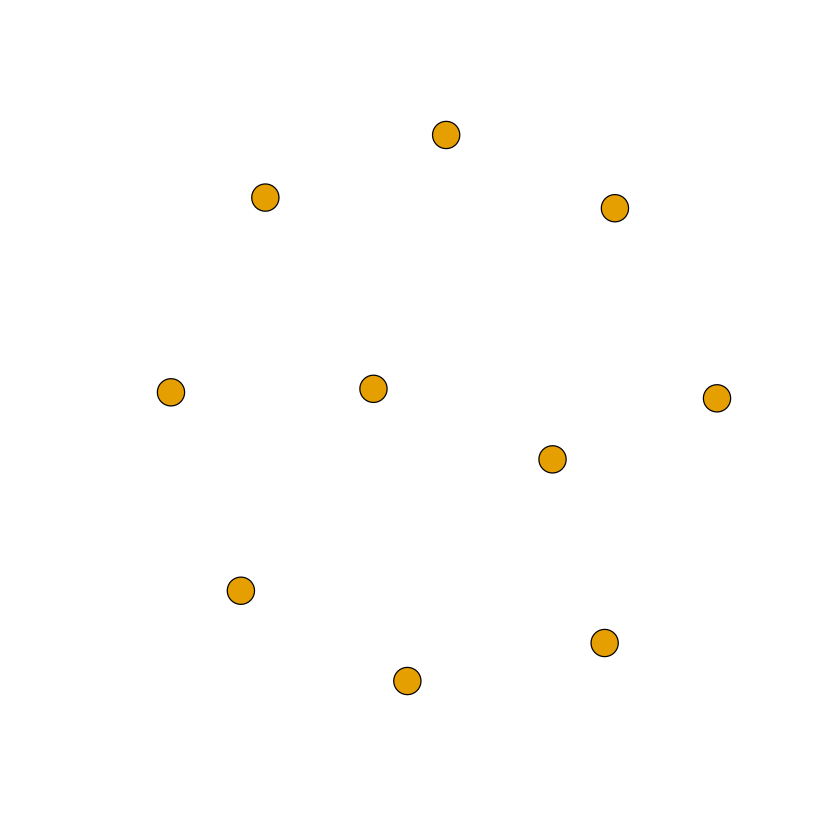

In [36]:
eg <- make_empty_graph(10)

plot(eg, vertex.size=10, vertex.label=NA)

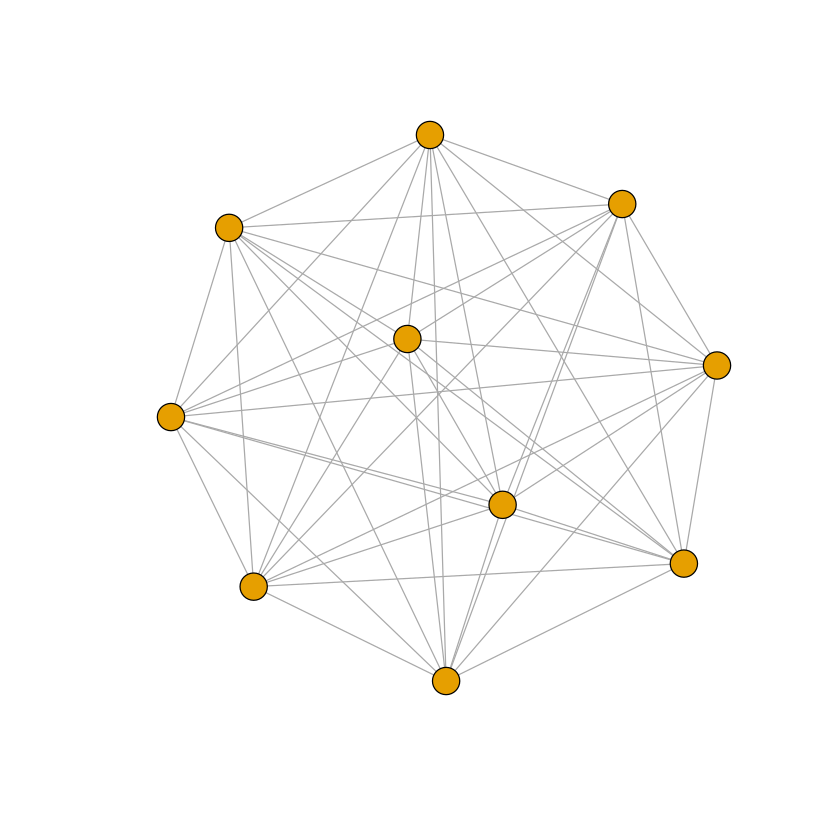

In [37]:
fg <- make_full_graph(10)

plot(fg, vertex.size=10, vertex.label=NA)

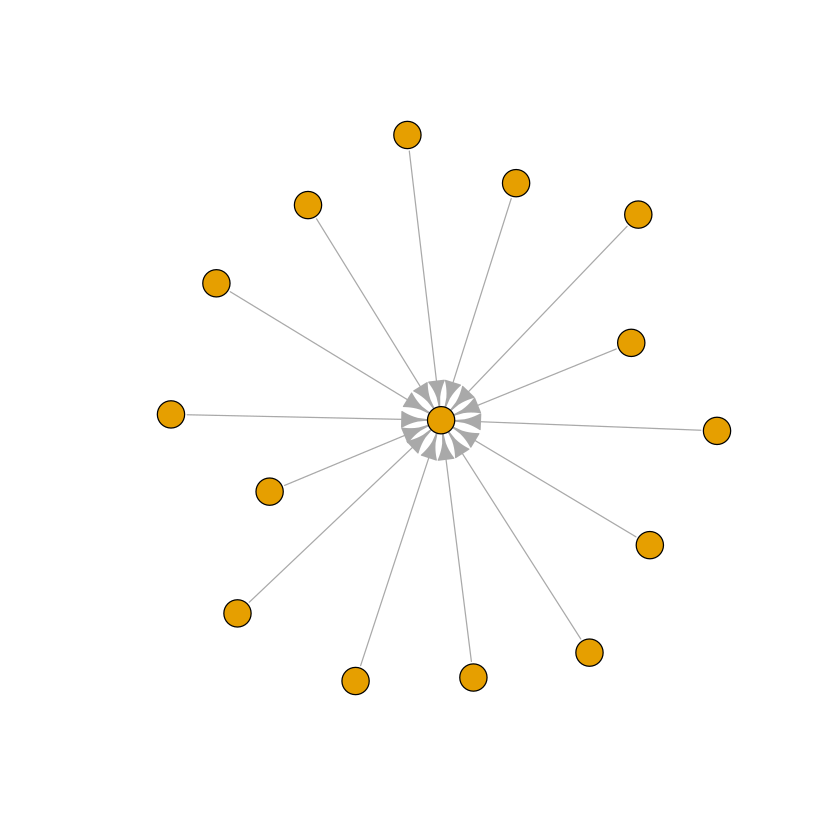

In [38]:
st <- make_star(15)

plot(st, vertex.size=10, vertex.label=NA) 

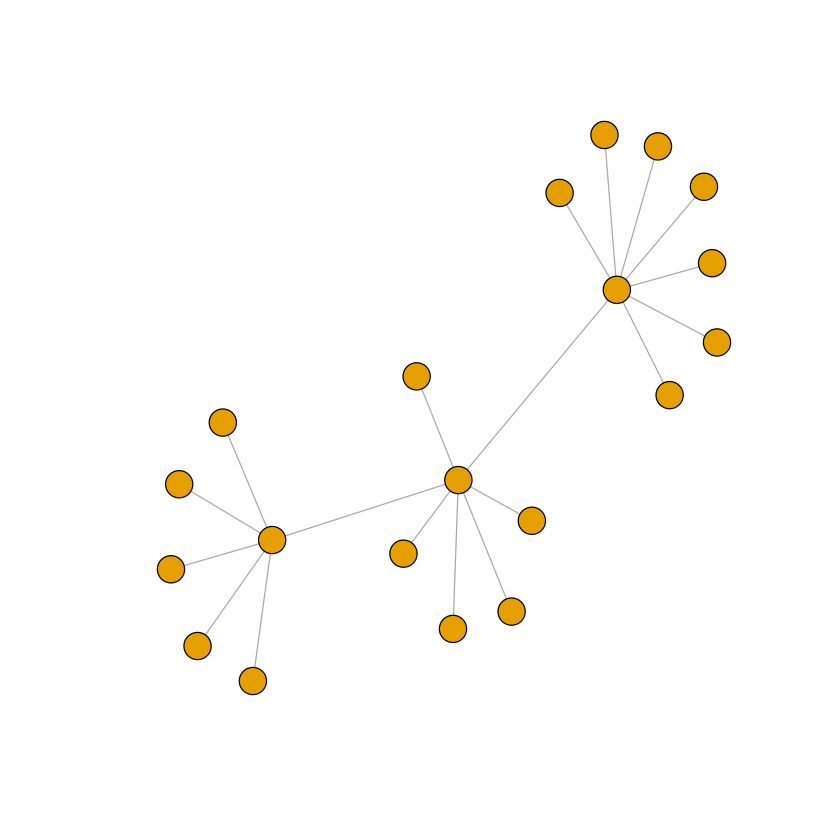

In [39]:
#-- tree graph

tr <- make_tree(20, children = 7, mode = "undirected")
plot(tr, vertex.size=10, vertex.label=NA) 

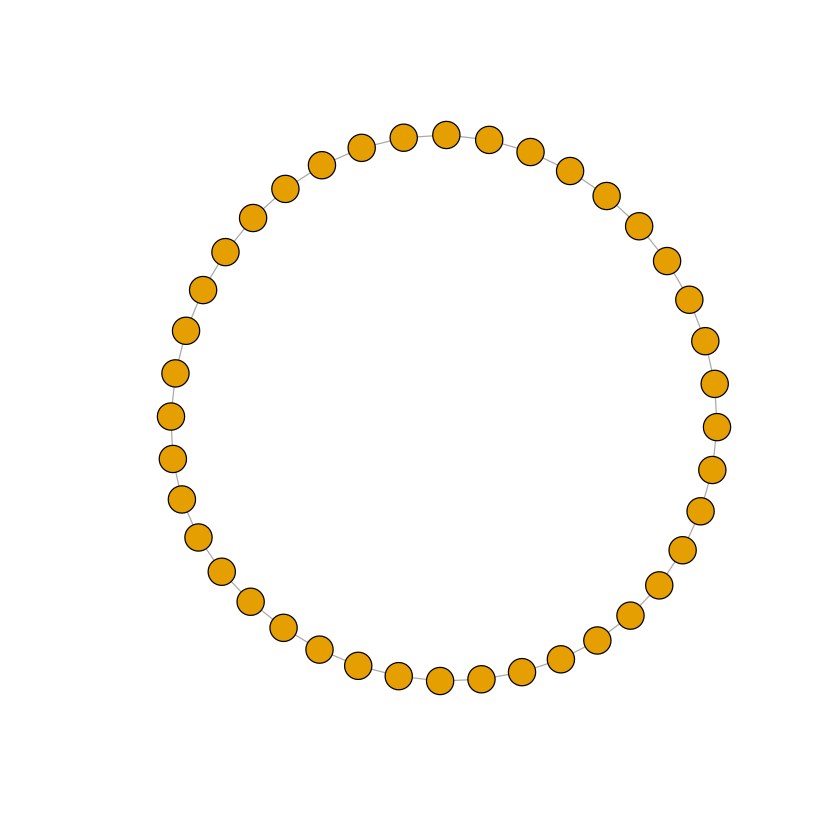

In [40]:
# ring graph
rn <- make_ring(40)
plot(rn, vertex.size=10, vertex.label=NA)

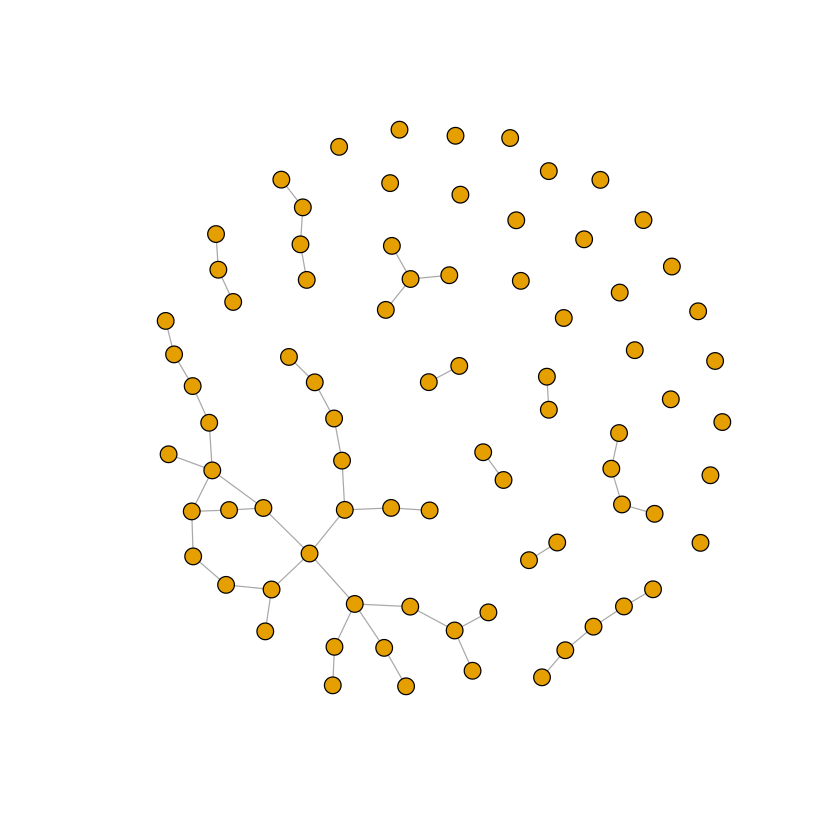

In [41]:
#-- Erdos-Renyi random graph model
#-- (‘n’ is number of nodes, ‘m’ is the number of edges).

er <- sample_gnm(n=80, m=50) 
plot(er, vertex.size=6, vertex.label=NA) 

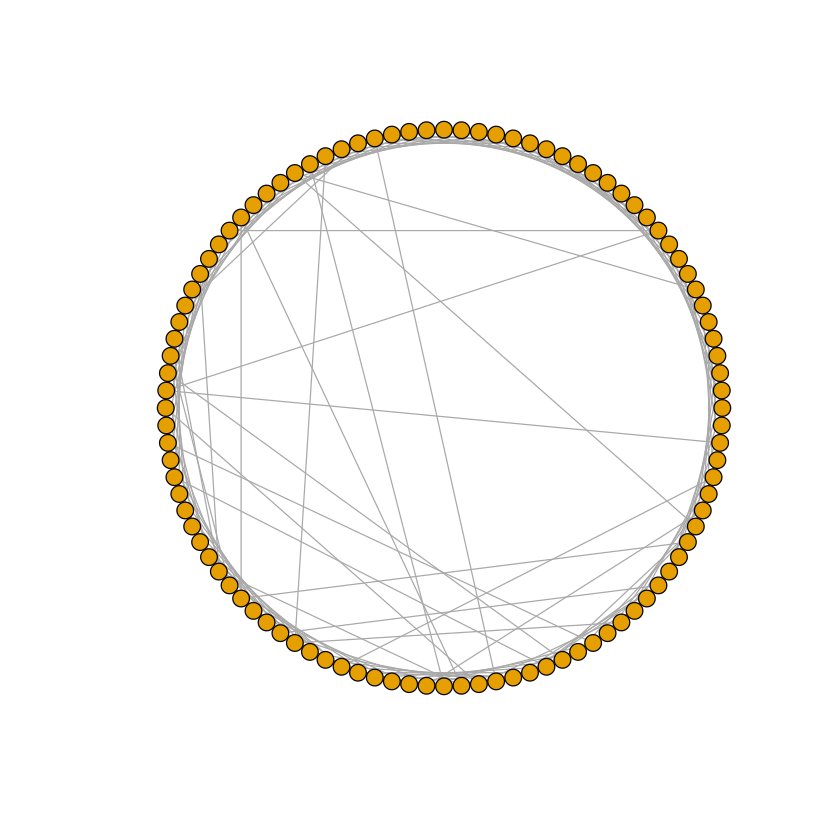

In [42]:
#-- Watts-Strogatz small-world model
#--- Creates a lattice (with dim dimensions and size nodes across dimension)
#-- and rewires edges randomly with probability p. The neighborhood in which edges are connected is nei. You can allow loops and multiple edges.

sw <- sample_smallworld(dim=2, size=10, nei=1, p=0.1)
plot(sw, vertex.size=6, vertex.label=NA, layout=layout_in_circle)

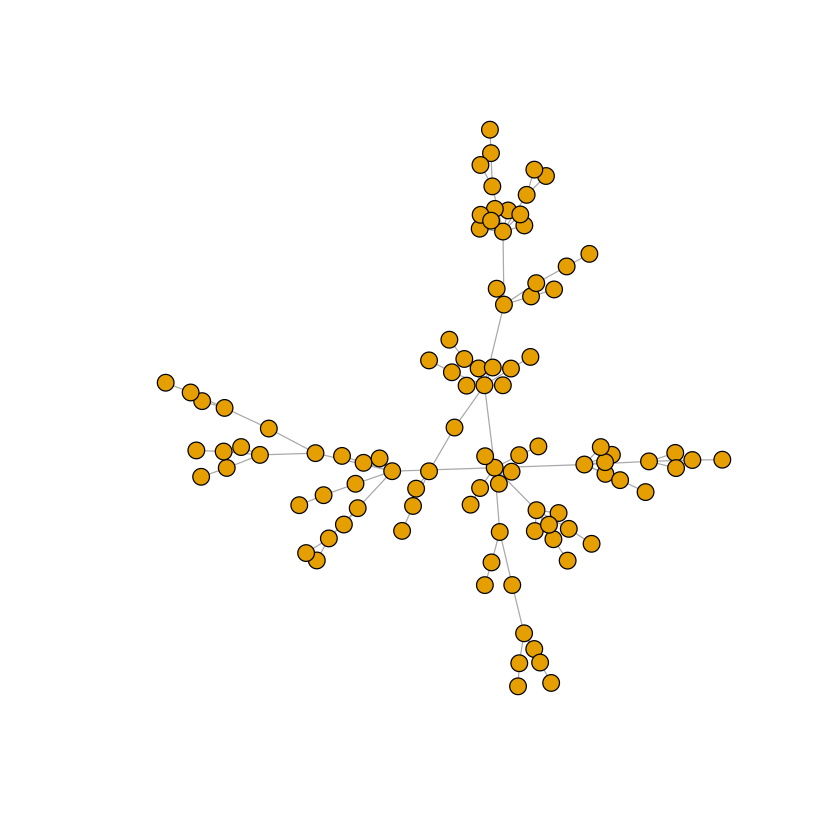

In [43]:
#-- arabasi-Albert preferential attachment model for scale-free graphs
#-- (n is number of nodes, power is the power of attachment (1 is linear); 
#--  m is the number of edges added on each time step)

ba <-  sample_pa(n=100, power=1, m=1,  directed=F)

plot(ba, vertex.size=6, vertex.label=NA)

In [44]:
#--- Dataset

nodes <- read.csv("data/netscix2016/Dataset1-Media-Example-NODES.csv", header=T, as.is=T)

links <- read.csv("data/netscix2016/Dataset1-Media-Example-EDGES.csv", header=T, as.is=T)


In [45]:
head(nodes)

id,media,media.type,type.label,audience.size
s01,NY Times,1,Newspaper,20
s02,Washington Post,1,Newspaper,25
s03,Wall Street Journal,1,Newspaper,30
s04,USA Today,1,Newspaper,32
s05,LA Times,1,Newspaper,20
s06,New York Post,1,Newspaper,50


In [46]:
head(links)

from,to,weight,type
s01,s02,10,hyperlink
s01,s02,12,hyperlink
s01,s03,22,hyperlink
s01,s04,21,hyperlink
s04,s11,22,mention
s05,s15,21,mention


In [47]:
cat("Nodes:\n")
print(head(nodes))
cat("\n")
cat("Links:\n")
print(head(links))
cat("\n")
cat(sprintf("Number of nodes:%d\n", nrow(nodes)))
cat("\n")
cat(sprintf("Number of unique nodes:%d\n", length(unique(nodes$id))))
cat("\n")
cat(sprintf("Number of links:%d\n", nrow(links)))
cat("\n")
cat("First unique links:\n")
head(unique(links[,c("from", "to")]))

Nodes:
   id               media media.type type.label audience.size
1 s01            NY Times          1  Newspaper            20
2 s02     Washington Post          1  Newspaper            25
3 s03 Wall Street Journal          1  Newspaper            30
4 s04           USA Today          1  Newspaper            32
5 s05            LA Times          1  Newspaper            20
6 s06       New York Post          1  Newspaper            50

Links:
  from  to weight      type
1  s01 s02     10 hyperlink
2  s01 s02     12 hyperlink
3  s01 s03     22 hyperlink
4  s01 s04     21 hyperlink
5  s04 s11     22   mention
6  s05 s15     21   mention

Number of nodes:17

Number of unique nodes:17

Number of links:52

First unique links:


,from,to
1,s01,s02
3,s01,s03
4,s01,s04
5,s04,s11
6,s05,s15
7,s06,s17


In [51]:
#--- creating a graph

g <- graph_from_data_frame(d=links, vertices=nodes, directed=T) 
class(g)

[1] "igraph"

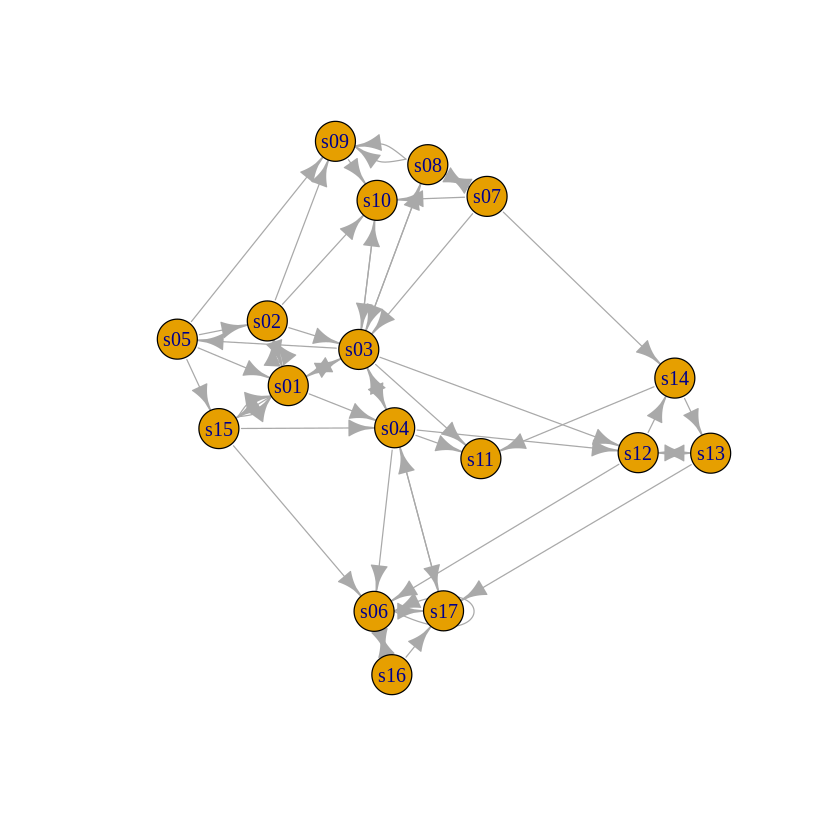

In [52]:
plot(g)

### Graph properties

[igraph manual](https://igraph.org/r/doc/)

In [53]:
betweenness(g)

s01        s02        s03        s04        s05        s06        s07 
 34.000000  23.666667 145.833333  91.333333  49.000000  21.500000   0.500000 
       s08        s09        s10        s11        s12        s13        s14 
 14.000000   0.000000  48.000000   0.000000  45.500000  21.500000   1.000000 
       s15        s16        s17 
  2.333333   0.000000  66.000000

In [54]:
hub.score(g)

$vector
        s01         s02         s03         s04         s05         s06 
1.000000000 0.543251069 0.448940982 0.422920348 0.454234506 0.016340162 
        s07         s08         s09         s10         s11         s12 
0.092270528 0.062404523 0.047482844 0.029977109 0.000000000 0.007583877 
        s13         s14         s15         s16         s17 
0.015430155 0.005401351 0.220354378 0.029079049 0.043184733 

$value
[1] 2896.375

$options
$options$bmat
[1] "I"

$options$n
[1] 17

$options$which
[1] "LM"

$options$nev
[1] 1

$options$tol
[1] 0

$options$ncv
[1] 0

$options$ldv
[1] 0

$options$ishift
[1] 1

$options$maxiter
[1] 1000

$options$nb
[1] 1

$options$mode
[1] 1

$options$start
[1] 1

$options$sigma
[1] 0

$options$sigmai
[1] 0

$options$info
[1] 0

$options$iter
[1] 4

$options$nconv
[1] 1

$options$numop
[1] 20

$options$numopb
[1] 0

$options$numreo
[1] 20

In [55]:
get.adjlist(g)

$s01
+ 10/17 vertices, named, from 72433bd:
 [1] s02 s02 s02 s03 s03 s04 s05 s15 s15 s15

$s02
+ 7/17 vertices, named, from 72433bd:
[1] s01 s01 s01 s03 s05 s09 s10

$s03
+ 13/17 vertices, named, from 72433bd:
 [1] s01 s01 s02 s04 s04 s05 s07 s08 s08 s10 s10 s11 s12

$s04
+ 9/17 vertices, named, from 72433bd:
[1] s01 s03 s03 s06 s11 s12 s15 s17 s17

$s05
+ 5/17 vertices, named, from 72433bd:
[1] s01 s02 s03 s09 s15

$s06
+ 8/17 vertices, named, from 72433bd:
[1] s04 s06 s06 s12 s15 s16 s16 s17

$s07
+ 5/17 vertices, named, from 72433bd:
[1] s03 s08 s08 s10 s14

$s08
+ 6/17 vertices, named, from 72433bd:
[1] s03 s03 s07 s07 s09 s09

$s09
+ 5/17 vertices, named, from 72433bd:
[1] s02 s05 s08 s08 s10

$s10
+ 5/17 vertices, named, from 72433bd:
[1] s02 s03 s03 s07 s09

$s11
+ 3/17 vertices, named, from 72433bd:
[1] s03 s04 s14

$s12
+ 6/17 vertices, named, from 72433bd:
[1] s03 s04 s06 s13 s13 s14

$s13
+ 4/17 vertices, named, from 72433bd:
[1] s12 s12 s14 s17

$s14
+ 4/17 vertices, named,